In [1]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv(r'../data/direct_transitivity_data.csv')
df.head()

,Index,File,Nodes,Total Nodes,Butterflies,X-vars,C-vars,Total vars,Total constraints,Crossings,...,config,check_1,check_2,check_3,check_4,check_5,check_6,check_7,check_8,check_9
0,0,north/g.10.72.graphml,10,12,0,8,7,15,20,0,...,d_235689,0,1,1,0,1,1,0,1,1
1,1,north/g.13.45.graphml,13,13,0,6,2,8,8,0,...,d_235689,0,1,1,0,1,1,0,1,1
2,2,north/g.10.11.graphml,10,10,0,15,0,15,40,0,...,d_235689,0,1,1,0,1,1,0,1,1
3,3,Rome-Lib/graficon11nodi/grafo233.11,11,18,0,15,12,27,36,0,...,d_235689,0,1,1,0,1,1,0,1,1
4,4,Rome-Lib/graficon12nodi/grafo2240.12,12,16,0,12,11,23,30,0,...,d_235689,0,1,1,0,1,1,0,1,1


In [3]:
df['Status'].value_counts()

2    437453
9    151347
Name: Status, dtype: int64

In [4]:
df.columns

Index(['Index', 'File', 'Nodes', 'Total Nodes', 'Butterflies', 'X-vars',
       'C-vars', 'Total vars', 'Total constraints', 'Crossings', 'Opttime',
       'Status', 'Nodes visited', 'Setup Time', 'config', 'check_1', 'check_2',
       'check_3', 'check_4', 'check_5', 'check_6', 'check_7', 'check_8',
       'check_9'],
      dtype='object')

In [5]:
temp_df = df[df['Opttime']>60][['Total Nodes', 'Crossings','Opttime','Status', 'check_1', 'check_2',
       'check_3', 'check_4', 'check_5', 'check_6', 'check_7', 'check_8',
       'check_9']]

temp_df.head()

,Total Nodes,Crossings,Opttime,Status,check_1,check_2,check_3,check_4,check_5,check_6,check_7,check_8,check_9
267,64,940,60.404265,9,0,1,1,0,1,1,0,1,1
368,84,21,60.117755,9,0,1,1,0,1,1,0,1,1
374,83,21,60.181258,9,0,1,1,0,1,1,0,1,1
379,86,21,60.220476,9,0,1,1,0,1,1,0,1,1
382,80,55,60.306249,9,0,1,1,0,1,1,0,1,1


In [6]:
temp_df[(temp_df['Status'] == 9) &  (temp_df['Opttime'] > 70)]

,Total Nodes,Crossings,Opttime,Status,check_1,check_2,check_3,check_4,check_5,check_6,check_7,check_8,check_9
196419,199,20,70.345193,9,0,0,0,1,1,0,0,0,1
292634,114,38,171.369854,9,0,0,0,1,1,0,1,1,1
292835,156,232,108.306035,9,0,0,0,1,1,0,1,1,1
497510,154,38,72.264470,9,0,0,1,0,1,1,0,1,0


### Distribution of Opttime of opttime

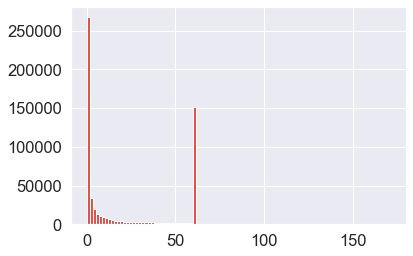

In [7]:
plt.hist(df['Opttime'], bins = 100)
plt.show()

### Distribution of Opttime for status = 9 

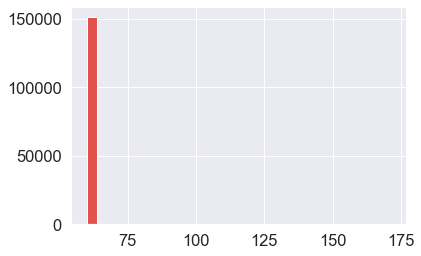

In [8]:
opttime_status_9 = df[df['Status']==9]['Opttime'].to_numpy()


plt.hist(opttime_status_9, bins = 30)
plt.show()

### Distribution of Opttime of opttime less than 60 / status =2 

In [9]:
opttime_status_2 = df[df['Status']==2]['Opttime'].to_numpy()




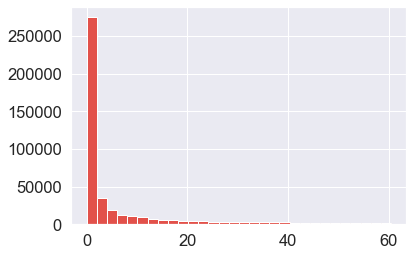

In [10]:
plt.hist(opttime_status_2, bins = 30)
plt.show()

### Distribution of Opttime in Ranges

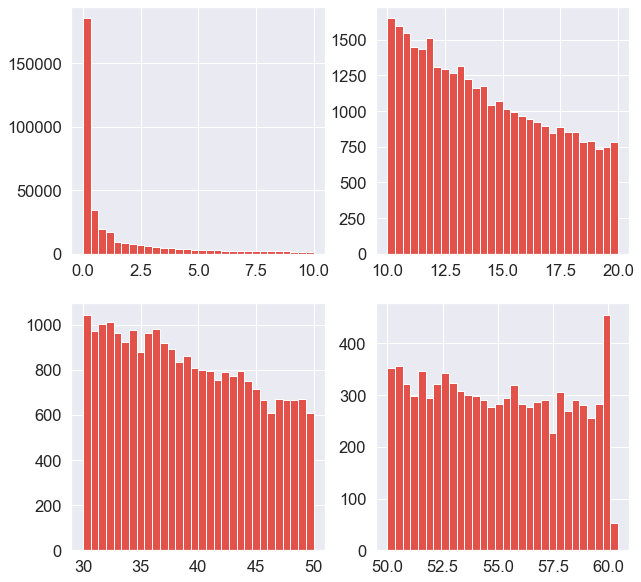

In [11]:
opttime_between_less_10 = df[(df['Opttime']<10)]['Opttime'].to_numpy()
opttime_between_10_30 = df[(df['Opttime']>10)&(df['Opttime']<20)]['Opttime'].to_numpy()
optime_between_30_50 = df[(df['Opttime']>30)&(df['Opttime']<50)]['Opttime'].to_numpy()
optime_between_50_60 = df[(df['Opttime']>50)&(df['Status']==2)]['Opttime'].to_numpy()

bins = 30
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].hist(opttime_between_less_10, bins = bins)
ax[0,1].hist(opttime_between_10_30, bins = bins)
ax[1,0].hist(optime_between_30_50, bins = bins)
ax[1,1].hist(optime_between_50_60, bins = bins)

plt.show()

### Attempt to transform and plot opttime

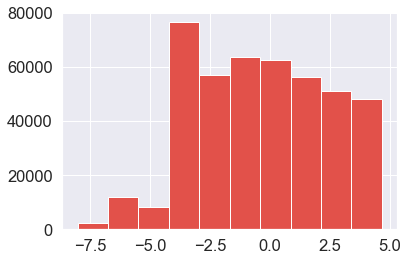

In [12]:
fitted_data, fitted_lambda = stats.boxcox(opttime_status_2)
plt.hist(fitted_data)
plt.show()

### Distribution of transformed Opttime in Ranges

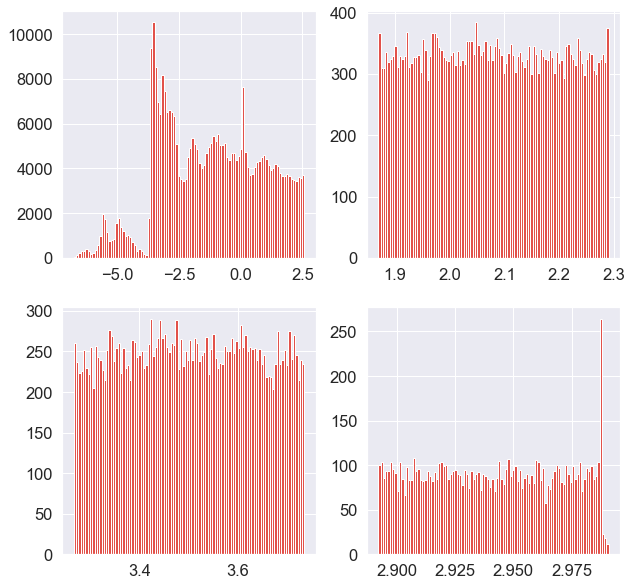

In [13]:
fitted_data_1, fitted_lambda_1 = stats.boxcox(opttime_between_less_10)
fitted_data_2, fitted_lambda_2 = stats.boxcox(opttime_between_10_30)
fitted_data_3, fitted_lambda_3 = stats.boxcox(optime_between_30_50)
fitted_data_4, fitted_lambda_4 = stats.boxcox(optime_between_50_60)

fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].hist(fitted_data_1, bins = 100)
ax[0,1].hist(fitted_data_2, bins = 100)
ax[1,0].hist(fitted_data_3, bins = 100)
ax[1,1].hist(fitted_data_4, bins = 100)

plt.show()

Adding graph_id 

In [14]:
graph_df = pd.read_csv(r'../data/graph_properties.csv')

In [15]:
graph_df['graph_id'] = graph_df.index + 1
graph_df.head()

,Index,File,Nodes,NumLayers,NumEdges,EdgeDensity,AvgNodesPerLayer,AvgEdgesPerLayer,graph_id
0,0,north/g.10.72.graphml,12,6,13,0.520000,2.000000,2.600000,1
1,1,north/g.13.45.graphml,13,4,12,0.342857,3.250000,4.000000,2
2,2,north/g.10.11.graphml,10,5,14,1.000000,2.000000,3.500000,3
3,3,Rome-Lib/graficon11nodi/grafo233.11,18,8,19,0.475000,2.250000,2.714286,4
4,4,Rome-Lib/graficon12nodi/grafo2240.12,16,7,17,0.485714,2.285714,2.833333,5


In [16]:
graph_df.shape

(1150, 9)

In [17]:
df.head()

,Index,File,Nodes,Total Nodes,Butterflies,X-vars,C-vars,Total vars,Total constraints,Crossings,...,config,check_1,check_2,check_3,check_4,check_5,check_6,check_7,check_8,check_9
0,0,north/g.10.72.graphml,10,12,0,8,7,15,20,0,...,d_235689,0,1,1,0,1,1,0,1,1
1,1,north/g.13.45.graphml,13,13,0,6,2,8,8,0,...,d_235689,0,1,1,0,1,1,0,1,1
2,2,north/g.10.11.graphml,10,10,0,15,0,15,40,0,...,d_235689,0,1,1,0,1,1,0,1,1
3,3,Rome-Lib/graficon11nodi/grafo233.11,11,18,0,15,12,27,36,0,...,d_235689,0,1,1,0,1,1,0,1,1
4,4,Rome-Lib/graficon12nodi/grafo2240.12,12,16,0,12,11,23,30,0,...,d_235689,0,1,1,0,1,1,0,1,1


In [18]:
joined_df = df.merge(graph_df, on = 'File')
joined_df = joined_df[['graph_id','Total Nodes', 'Crossings','Opttime','Status', 'check_1', 'check_2',
       'check_3', 'check_4', 'check_5', 'check_6', 'check_7', 'check_8',
       'check_9' ]]

In [19]:
joined_df.head()


,graph_id,Total Nodes,Crossings,Opttime,Status,check_1,check_2,check_3,check_4,check_5,check_6,check_7,check_8,check_9
0,1,12,0,0.000556,2,0,1,1,0,1,1,0,1,1
1,1,12,0,0.000984,2,1,0,0,0,1,0,0,1,0
2,1,12,0,0.000857,2,1,0,0,0,1,1,1,0,0
3,1,12,0,0.000621,2,0,1,1,1,1,1,0,1,0
4,1,12,0,0.000661,2,0,0,0,0,1,0,0,1,0


In [20]:
joined_df.groupby(['graph_id'])['Opttime'].mean()

graph_id
1        0.002922
2        0.000548
3        0.000053
4        0.005507
5        0.147989
          ...    
1146    60.110456
1147    60.085090
1148    60.031670
1149    42.766048
1150    42.394350
Name: Opttime, Length: 1150, dtype: float64

In [21]:
df_no_checks = pd.read_csv(r'../data/direct_transitivity/d_.csv')

In [22]:
df_no_checks

,Index,File,Nodes,Total Nodes,Butterflies,X-vars,C-vars,Total vars,Total constraints,Crossings,Opttime,Status,Nodes visited,Setup Time
0,0,north/g.10.72.graphml,10,12,0,8,7,15,18,0,0.001962,2,0,0.028
1,1,north/g.13.45.graphml,13,13,0,31,2,33,118,0,0.000073,2,0,0.004
2,2,north/g.10.11.graphml,10,10,0,15,0,15,40,0,0.000067,2,0,0.002
3,3,Rome-Lib/graficon11nodi/grafo233.11,11,18,0,15,12,27,36,0,0.000055,2,0,0.002
4,4,Rome-Lib/graficon12nodi/grafo2240.12,12,16,0,12,11,23,28,0,0.011561,2,1,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,1145,Rome-Lib/graficon83nodi/grafo7818.83,83,232,0,2515,3173,5688,44232,427,60.059385,9,1,2.431
1146,1146,Rome-Lib/graficon92nodi/grafo8646.92,92,231,1,2840,3752,6592,59244,660,60.106764,9,1,3.563
1147,1147,Rome-Lib/graficon91nodi/grafo11599.91,91,230,0,2165,2658,4823,34898,258,60.041819,9,1,1.950
1148,1148,Rome-Lib/graficon100nodi/grafo11613.100,100,231,1,1785,2201,3986,26832,196,60.041623,9,1,1.433


# Model Assumptions

In [23]:
cols_of_interest = ['Opttime','Total vars','Total constraints','Total Nodes', 'check_1', 'check_2', 'check_3', 'check_4',
 'check_5', 'check_6','check_7', 'check_8', 'check_9']
subset_df = df[cols_of_interest]
correlation_matrix = subset_df.corr()

# Display the correlation matrix
print(round(correlation_matrix,2))

                   Opttime  Total vars  Total constraints  Total Nodes  \
Opttime               1.00        0.73               0.67         0.74   
Total vars            0.73        1.00               0.87         0.79   
Total constraints     0.67        0.87               1.00         0.67   
Total Nodes           0.74        0.79               0.67         1.00   
check_1              -0.14        0.00               0.00         0.00   
check_2              -0.00       -0.00               0.00         0.00   
check_3               0.04        0.00               0.00        -0.00   
check_4               0.00        0.35               0.11        -0.00   
check_5               0.00        0.00               0.00         0.00   
check_6              -0.00       -0.01              -0.01        -0.00   
check_7              -0.01       -0.00               0.00         0.00   
check_8               0.00        0.00              -0.00        -0.00   
check_9               0.02        0.00

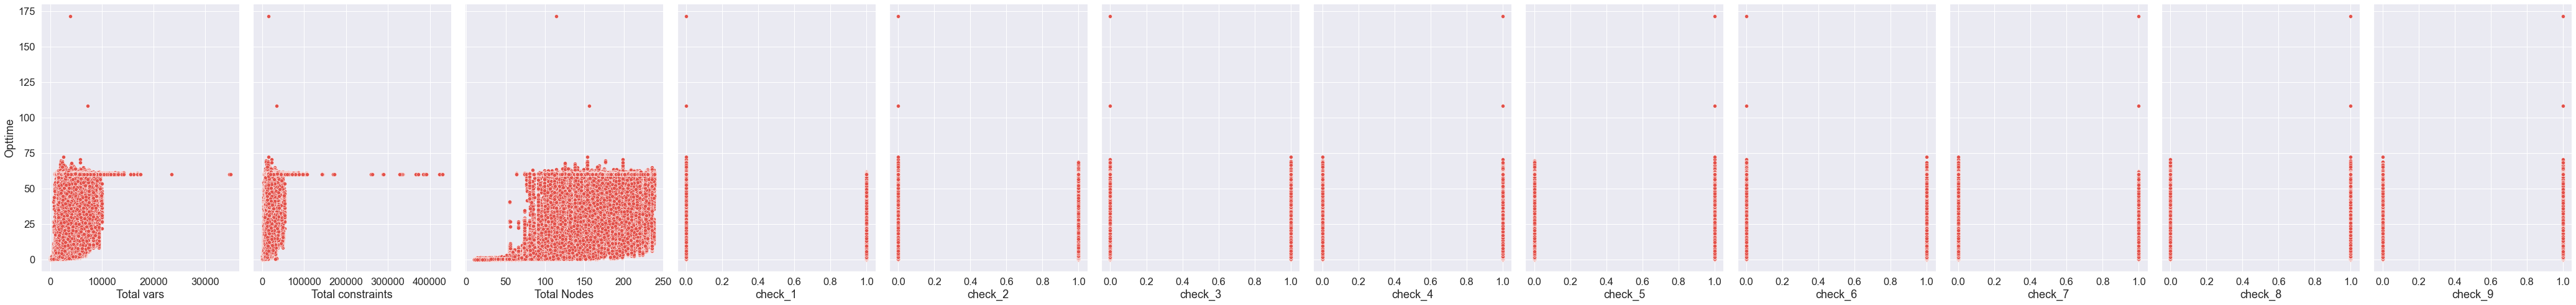

In [24]:
p = sns.pairplot(subset_df, x_vars=['Total vars','Total constraints','Total Nodes', 'check_1', 'check_2', 'check_3', 'check_4',
 'check_5', 'check_6','check_7', 'check_8', 'check_9'], y_vars='Opttime', size=7, aspect=0.7)

In [26]:
x,y = subset_df.iloc[:,1:], subset_df.iloc[:,0]

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

### Training Model

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)

### Checking R-squared


In [31]:
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))


R squared: 0.6519166685977569


### Checking Mean of residuals 

In [32]:
residuals = y.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.0241083343672749e-15


### Checking constant vairance (Homoscedasticity)

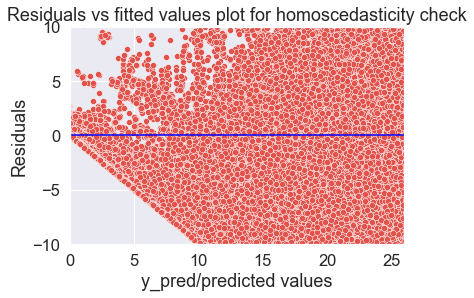

In [33]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

### Goldfeld Quandt Test for homoscedasticity

Goldfeld Quandt Test
Checking homoscedasticity : Using Goldfeld Quandt we test for homoscedasticity.

Null Hypothesis: Error terms are homoscedastic

Alternative Hypothesis: Error terms are homoscedastic.

In [34]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

[('F statistic', 1.0005179845247094), ('p-value', 0.44413788313736496)]

Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic. Good.

In [38]:
from scipy.stats import bartlett
test = bartlett(X.flatten(),residuals)
print(test)

BartlettResult(statistic=19205787.093383495, pvalue=0.0)


Since p value is quite less than 0.05 in Bartlett, it's null hypothesis that error terms are homoscedastic gets rejected, that's not good for a regression.

### Check for Normality of error terms/residuals

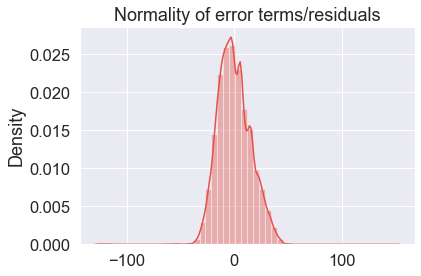

In [39]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

### Correlation

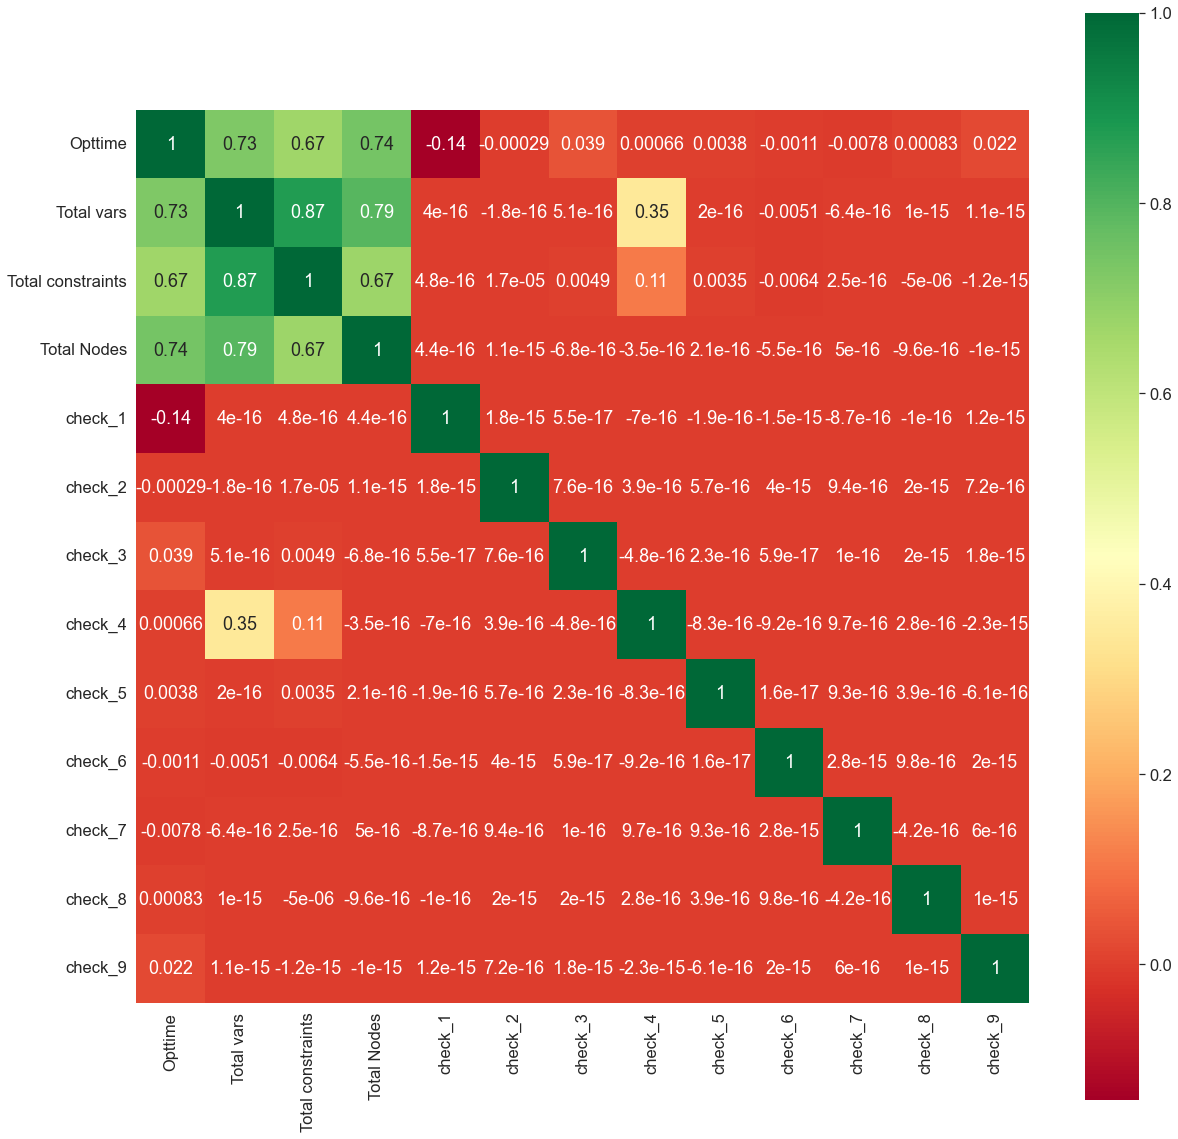

In [40]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(subset_df.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap